<a href="https://colab.research.google.com/github/mercy09/ijeoma/blob/main/Employee_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('Salary_Data1.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [ ]:
# CLEAN THE DATA
#REMOVE MISSING
df = df.dropna()
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
# REMOVE DUPLICATE
df = df.drop_duplicates()
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
6624,27.0,Male,High School,Sales Manager,2.0,40000.0
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


In [ ]:
# Reset index
df = df.reset_index(drop=True)

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1787 non-null   float64
 1   Gender               1787 non-null   object 
 2   Education Level      1787 non-null   object 
 3   Job Title            1787 non-null   object 
 4   Years of Experience  1787 non-null   float64
 5   Salary               1787 non-null   float64
dtypes: float64(3), object(3)
memory usage: 83.9+ KB


In [ ]:
# IN THE EDUCATIONAL LEVEL COMPLETE SOME IMCOMPLETE SENTENCES
df['Education Level'] = df['Education Level'].replace({
    "Master's": "Master's Degree",
    "Bachelor's": "Bachelor's Degree",
    "phD": "PhD"

})

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0
...,...,...,...,...,...,...
1782,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
1783,27.0,Male,High School,Sales Manager,2.0,40000.0
1784,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
1785,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


In [ ]:
# PERFORM DESCRIPTIVE ANALYSIS
df.describe()

,Age,Years of Experience,Salary
count,1787.000000,1787.000000,1787.000000
mean,35.139899,9.156128,113184.659765
std,8.213045,6.844924,51596.536766
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,34.000000,250000.000000


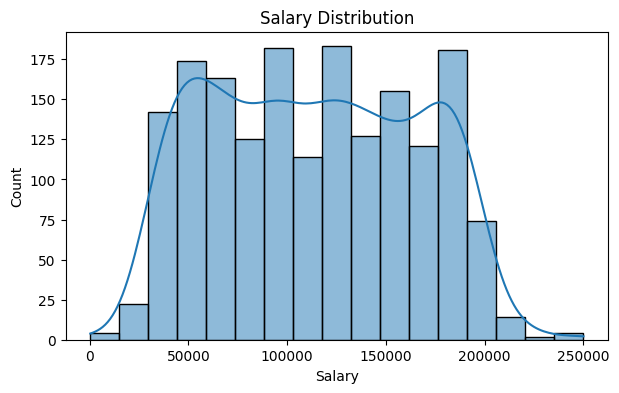

In [ ]:
# Salary distribution
plt.figure(figsize=(7,4))
sns.histplot(df['Salary'], kde=True)
plt.title("Salary Distribution")
plt.show()

In [ ]:
# Average salary
print("\nAverage Salary:", df['Salary'].mean())
print("Median Salary:", df['Salary'].median())


Average Salary: 113184.65976496923
Median Salary: 110000.0


In [ ]:
# COMPARATIVE ANALYSIS
print("\n--- AVERAGE SALARY BY GENDER ---")
print(df.groupby('Gender')['Salary'].mean())


--- AVERAGE SALARY BY GENDER ---
Gender
Female    107294.798526
Male      118056.198758
Other     125819.000000
Name: Salary, dtype: float64


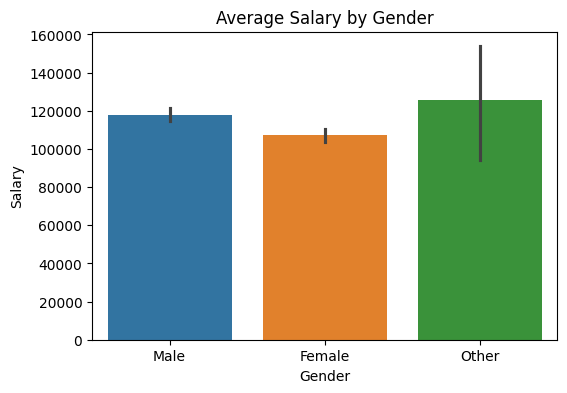

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Salary', data=df, hue='Gender')
plt.title("Average Salary by Gender")
plt.show()

In [ ]:
print("\n--- AVERAGE SALARY BY EDUCATION ---")
print(df.groupby('Education Level')['Salary'].mean())


--- AVERAGE SALARY BY EDUCATION ---
Education Level
Bachelor's Degree     91145.566406
High School           45435.981818
Master's Degree      127432.806338
PhD                  160942.521994
Name: Salary, dtype: float64


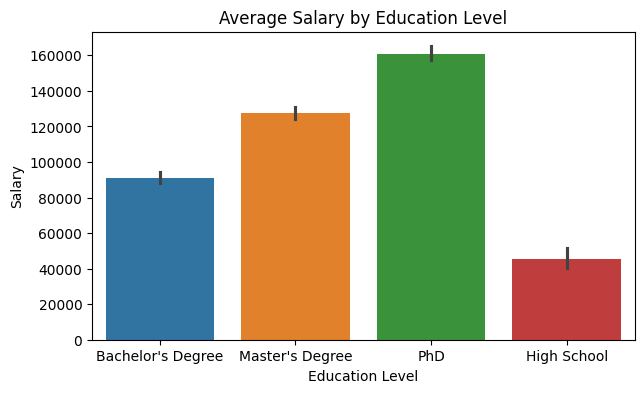

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x='Education Level', y='Salary', data=df, hue='Education Level')
plt.title("Average Salary by Education Level")
plt.show()


--- SALARY VS YEARS OF EXPERIENCE ---


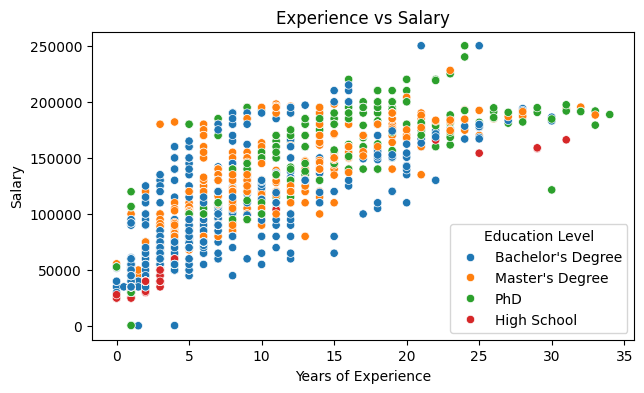

In [ ]:
print("\n--- SALARY VS YEARS OF EXPERIENCE ---")
plt.figure(figsize=(7,4))
sns.scatterplot(x='Years of Experience', y='Salary', hue='Education Level', data=df)
plt.title("Experience vs Salary")
plt.show()



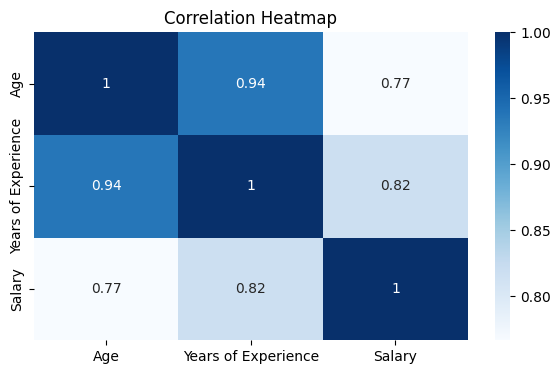

In [ ]:
# Correlation heatmap
plt.figure(figsize=(7,4))
sns.heatmap(df[['Age','Years of Experience','Salary']].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# PART 3 — PREDICTIVE ANALYSIS (MACHINE LEARNING)
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])
df['Education_encoded'] = le.fit_transform(df['Education Level'])
df['Job_encoded'] = le.fit_transform(df['Job Title'])



In [ ]:
# Select features and target
X = df[['Age','Years of Experience','Gender_encoded','Education_encoded','Job_encoded']]
y = df['Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
# Predict
y_pred = model.predict(X_test)

print("\n--- PREDICTIVE ANALYSIS RESULTS ---")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# Example prediction
sample = pd.DataFrame({
    "Age":[45],
    "Years of Experience":[15],
    "Gender_encoded":[1],      # female
    "Education_encoded":[3],   # Master's
    "Job_encoded":[144]          # Example job code
})

print("\nPredicted Salary for Sample Employee:", model.predict(sample)[0])



--- PREDICTIVE ANALYSIS RESULTS ---
R² Score: 0.6698396285762835
MAE: 22937.105570194482

Predicted Salary for Sample Employee: 159942.36235462752


In [ ]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_encoded,Education_encoded,Job_encoded
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,1,0,175
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,0,2,18
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,3,144
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,0,0,115
4,52.0,Male,Master's Degree,Director,20.0,200000.0,1,2,25
...,...,...,...,...,...,...,...,...,...
1782,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0,0,2,23
1783,27.0,Male,High School,Sales Manager,2.0,40000.0,1,1,118
1784,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0,0,0,33
1785,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0,1,0,116
